<a href="https://colab.research.google.com/github/Anamika-debug/ML-Task/blob/main/decision_tree_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=pd.read_csv(r'C:\Users\magal\university_ranking\UniversityRanking_16_17_18_19_20_21.csv')
df=pd.read_csv(r'C:\Users\magal\university_ranking\UniversityRanking_16_17_18_19_20_21.csv')
print(df)

      Institute Id                                     Institute Name  \
0    NIRF-UNIV-248              Indian Institute Of Science Bangalore   
1    NIRF-UNIV-282                   Institute Of Chemical Technology   
2    NIRF-UNIV-319                        Jawaharlal Nehru University   
3    NIRF-UNIV-745                  University Of Hyderabad-Hyderabad   
4    NIRF-UNIV-708                                  Tezpur University   
..             ...                                                ...   
595    IR-O-U-0121                                     Goa University   
596    IR-O-U-0043  Vignan's Foundation for Science, Technology an...   
597    IR-O-U-0555                             Graphic Era University   
598    IR-O-U-0223                         Jain university, Bangalore   
599    IR-O-U-0564         University of Petroleum and Energy Studies   

          City           State  Score  Rank    TLR    RPC      GO     OI  \
0    Bangalore      Karnataka   91.81     1  94

In [ ]:
df.describe()

,Score,Rank,TLR,RPC,GO,OI,Perception,Year
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,48.583767,50.423333,59.797050,28.992683,70.795758,58.279083,24.778450,2018.50000
std,10.357027,28.906518,12.360125,20.294081,17.444724,11.071956,25.398682,1.70925
min,32.990000,1.000000,22.610000,1.040000,0.000000,20.570000,0.000000,2016.00000
25%,40.877500,25.000000,50.790000,14.030000,61.840000,51.230000,4.327500,2017.00000
50%,46.295000,50.000000,59.850000,23.500000,69.240000,57.345000,18.935000,2018.50000
75%,53.132500,75.250000,68.665000,41.842500,81.112500,65.540000,34.597500,2020.00000
max,91.810000,100.000000,96.430000,96.510000,100.000000,88.830000,100.000000,2021.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Institute Id    600 non-null    object 
 1   Institute Name  600 non-null    object 
 2   City            600 non-null    object 
 3   State           600 non-null    object 
 4   Score           600 non-null    float64
 5   Rank            600 non-null    int64  
 6   TLR             600 non-null    float64
 7   RPC             600 non-null    float64
 8   GO              600 non-null    float64
 9   OI              600 non-null    float64
 10  Perception      600 non-null    float64
 11  Year            600 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 56.4+ KB


In [ ]:
x=df.drop(['Institute Id','Institute Name','City','State','Rank','Year'],axis=1)
x=x.values
x

array([[ 91.81,  94.45,  96.12, 100.  ,  67.18, 100.  ],
       [ 87.58,  84.53,  96.51,  94.  ,  61.66,  97.  ],
       [ 86.45,  89.45,  84.33, 100.  ,  73.57,  98.  ],
       ...,
       [ 38.91,  47.99,   9.74,  60.76,  62.23,  32.17],
       [ 38.89,  39.29,  12.72,  73.89,  59.54,  25.52],
       [ 38.88,  46.46,  15.08,  60.13,  61.98,  21.9 ]])

In [ ]:
y=df['Rank'].values
y

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  14,  15,  16,  16,  17,  18,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  21,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  8

In [ ]:
#splitting the DS into training and testing DS
from sklearn.model_selection import train_test_split
#splitting the DS
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 6) (120, 6) (480,) (120,)


In [ ]:
x_train, x_test, y_train, y_test

(array([[47.27, 58.32, 30.02, 61.65, 52.17, 32.14],
        [36.75, 53.99,  3.64, 61.44, 70.84,  0.94],
        [38.67, 56.32, 13.29, 63.64, 45.81,  4.7 ],
        ...,
        [53.89, 57.25, 55.9 , 86.86, 66.77,  0.  ],
        [57.58, 44.44, 61.93, 79.99, 49.91, 80.  ],
        [46.33, 53.44, 34.57, 64.43, 58.95, 11.45]]),
 array([[4.278e+01, 6.581e+01, 1.523e+01, 6.265e+01, 5.943e+01, 0.000e+00],
        [5.968e+01, 5.708e+01, 5.707e+01, 9.139e+01, 3.600e+01, 3.550e+01],
        [4.800e+01, 6.661e+01, 3.054e+01, 6.526e+01, 4.730e+01, 1.082e+01],
        [4.024e+01, 7.413e+01, 2.550e+00, 6.045e+01, 5.111e+01, 4.100e-01],
        [6.010e+01, 5.018e+01, 5.540e+01, 8.521e+01, 6.037e+01, 5.344e+01],
        [4.226e+01, 7.299e+01, 5.890e+00, 7.024e+01, 4.267e+01, 2.750e+00],
        [6.113e+01, 6.766e+01, 4.548e+01, 8.536e+01, 5.622e+01, 4.499e+01],
        [4.042e+01, 5.570e+01, 1.820e+01, 6.268e+01, 5.090e+01, 6.150e+00],
        [5.234e+01, 6.389e+01, 2.992e+01, 7.134e+01, 6.589e+01, 3

In [ ]:
import seaborn as sb

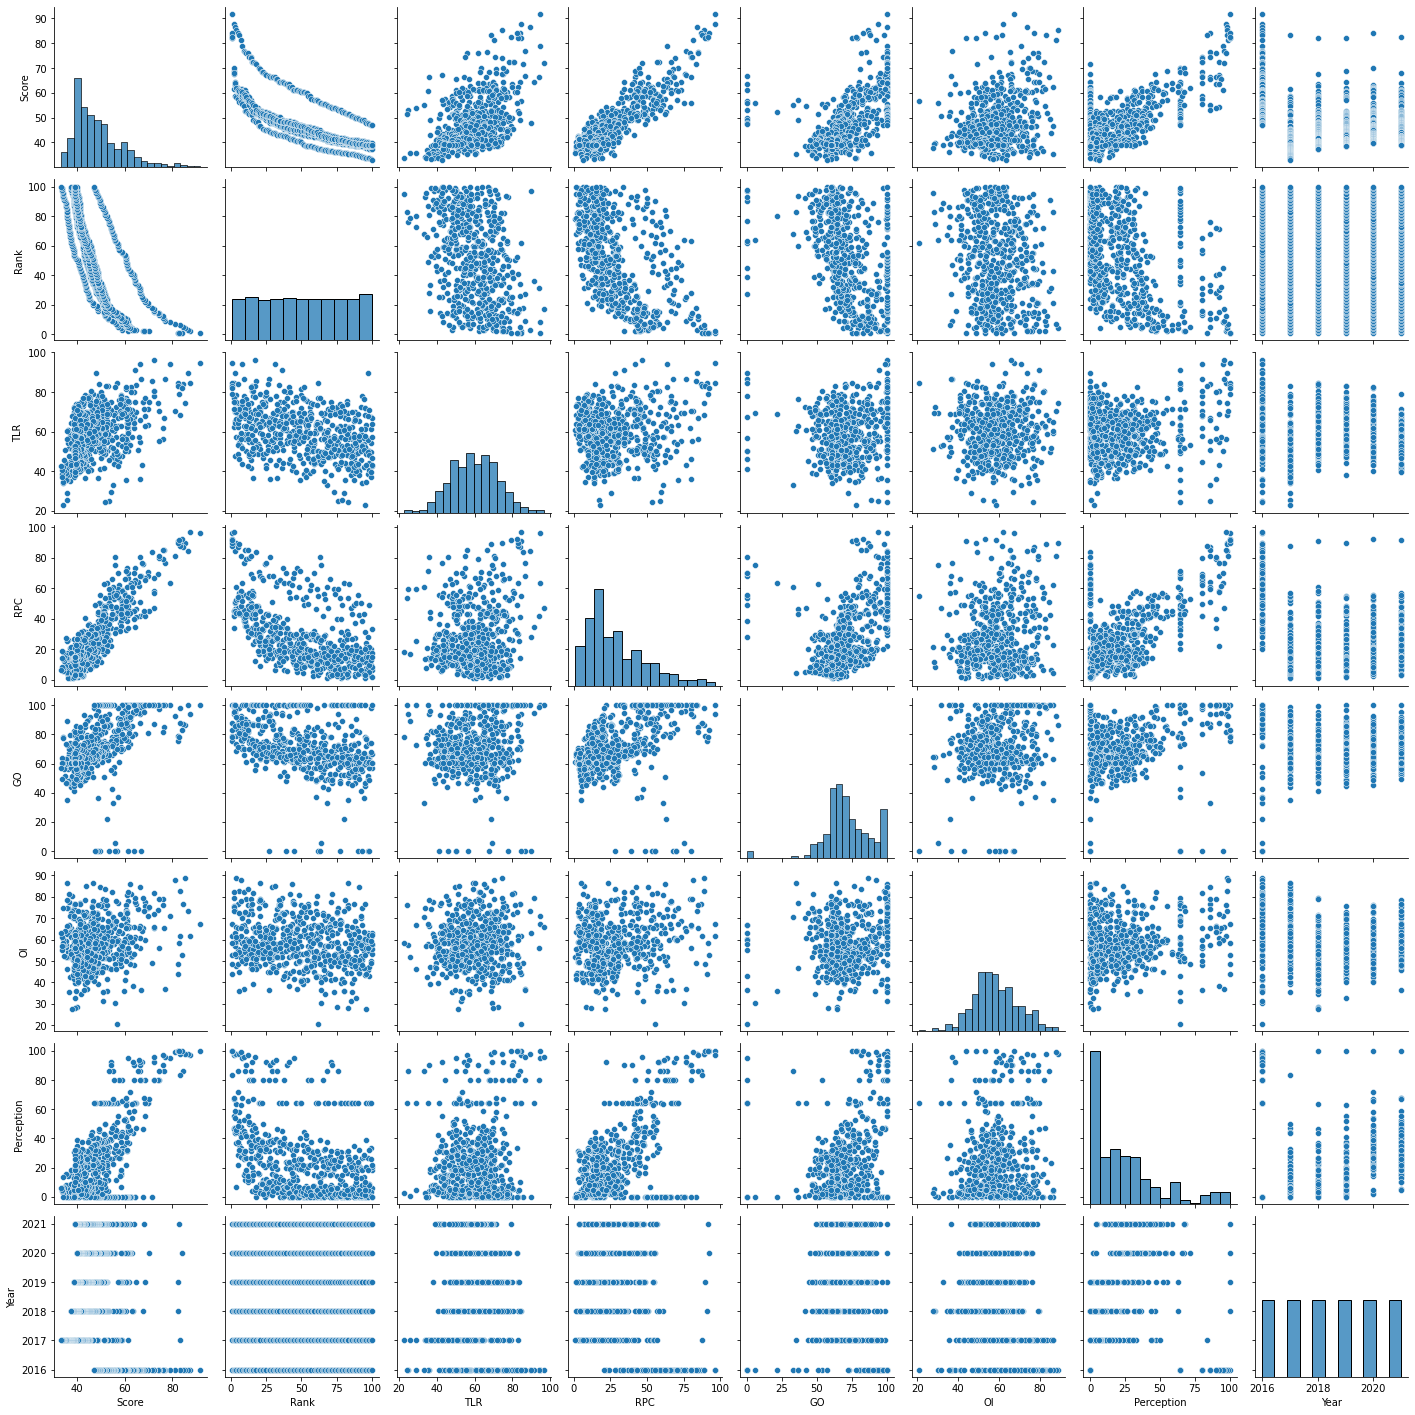

In [ ]:
sb.pairplot(df)

In [ ]:
df.corr()

,Score,Rank,TLR,RPC,GO,OI,Perception,Year
Score,1.000000,-0.723506,0.478895,0.883490,0.493412,0.246779,0.734863,-0.245063
Rank,-0.723506,1.000000,-0.376404,-0.557792,-0.409083,-0.188504,-0.426938,0.002500
TLR,0.478895,-0.376404,1.000000,0.151524,0.066757,0.044497,0.149021,-0.050475
RPC,0.883490,-0.557792,0.151524,1.000000,0.364201,0.128758,0.635461,-0.366496
GO,0.493412,-0.409083,0.066757,0.364201,1.000000,0.162285,0.285261,-0.144501
OI,0.246779,-0.188504,0.044497,0.128758,0.162285,1.000000,0.146454,-0.198916
Perception,0.734863,-0.426938,0.149021,0.635461,0.285261,0.146454,1.000000,-0.060512
Year,-0.245063,0.002500,-0.050475,-0.366496,-0.144501,-0.198916,-0.060512,1.000000


In [ ]:
# Decision Tree Regression model
# importing from the regressor

from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Creating and fitting the model

Rank_dt=DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
print('The training r_sq is: %.2f'% Rank_dt.score(x_train,y_train))

The training r_sq is: 1.00


In [ ]:
# Training model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
# Prediction on the DS
ytrain_pred=Rank_dt.predict(x_train)

In [ ]:
# The r_sq
print('The r_sq is:%.2f'%r2_score(y_train,ytrain_pred))

The r_sq is:1.00


In [ ]:
# The MAE
print('The MAE is:%.2f'%mean_absolute_error(y_train,ytrain_pred))

The MAE is:0.00


In [ ]:
# The MSE
print('The MSE is:%.2f'%mean_squared_error(y_train,ytrain_pred))

The MSE is:0.00


In [ ]:
# The RMSE
import numpy as np
print('The RMSE is:%.2f'%np.sqrt(mean_squared_error(y_train,ytrain_pred)))

The RMSE is:0.00


In [ ]:
# Prediction on the testing data
ytest_pred=Rank_dt.predict(x_test)

In [ ]:
# The r_sq
print('The testing r_sq is: %.2f'% r2_score(y_test,ytest_pred))

The testing r_sq is: 0.78


In [ ]:
print('The testing r_sq is: %.2f'% Rank_dt.score(x_test,y_test))

The testing r_sq is: 0.78


In [ ]:
#testing model evaluation

In [ ]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_test,ytest_pred))

The MAE is: 8.68


In [ ]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test,ytest_pred))

The MSE is: 182.48


In [ ]:
# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test,ytest_pred)))

The RMSE is: 13.51


In [ ]:
#predict new data
new_data=[[82.16,84.54,91.08,75.48,43.7,100]]
Rank_dt.predict(new_data)

array([1.])

In [ ]:
#predict new data
new_data=[[37.67,44.8,8.92,60.44,80.33,14.31]]
Rank_dt.predict(new_data)

array([71.])

In [ ]:
#predict new data
new_data=[[50,60,56,70,23,60]]
Rank_dt.predict(new_data)

array([90.])

In [ ]:
#predict new data
new_data=[[91.81,94.45,96.12,100,67.18,100]]
Rank_dt.predict(new_data)

array([1.])

In [ ]:
yr=int(input('Enter the year:'))
colname=input("Enter any one Column Name[Institute Id,Institute Name,City,State,Rank]:")
colname=colname.title()
colvalue=input("Enter corresponding Column Value[Institute Id,Institute Name,City,State,Rank]:")
if colname=='Rank':
    colvalue=int(colvalue)
elif colname=='Institute Id':
    colvalue=colvalue.upper()
else:
    colvalue=colvalue.title()
fetch=data[colname]==colvalue
rec=data[fetch]
record=data[fetch]

Enter the year:2019
Enter any one Column Name[Institute Id,Institute Name,City,State,Rank]:rank
Enter corresponding Column Value[Institute Id,Institute Name,City,State,Rank]:45


In [ ]:
record

,Institute Id,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,Year
45,NIRF-UNIV-338,Kalyani University,Kalyani,West Bengal,61.30,45,50.02,69.60,0.00,59.83,95.00,2016
144,IR17-I-2-1-299,Jagadguru Sri Shivarathreeshwara University,Mysore,Karnataka,41.18,45,55.34,10.32,61.55,76.67,14.99,2017
244,IR-4-O-OEMA-U-0474,Sathyabama Institute of Science and Technology,Chennai,Tamil Nadu,44.34,45,52.38,29.43,65.31,63.14,4.30,2018
344,IR-O-U-0463,Madurai Kamraj University,Madurai,Tamil Nadu,45.20,45,63.94,28.11,57.10,41.36,20.28,2019
444,IR-O-U-0098,Delhi Technological University,New Delhi,Delhi,48.06,45,57.71,28.86,66.91,54.62,32.53,2020
544,IR-O-U-0052,Gauhati University,Guwahati,Assam,47.35,45,55.17,19.05,83.56,58.40,25.34,2021


In [ ]:
fet=rec['Year']==yr
rc=rec[fet]
rc

,Institute Id,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,Year
344,IR-O-U-0463,Madurai Kamraj University,Madurai,Tamil Nadu,45.2,45,63.94,28.11,57.1,41.36,20.28,2019


In [ ]:
nd=[]
if len(rc)!=0:
    for i,r in rc.iterrows():
        lst=[r.Score,r.TLR,r.RPC,r.GO,r.OI,r.Perception]
        nd.append(lst)
    nd
    print('Rank: %.0f'%Rank_dt.predict(nd))
else:
    print('Data Not Available')

Rank: 45
